In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_data = pd.read_csv('Data/heart-disease.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


There are different performance metrics used in the ML
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

### Accuracy

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_data.drop("target", axis = 1)
y = heart_data.target

clf = RandomForestClassifier()

cross_values = cross_val_score(clf, X, y, cv = 5)

In [5]:
np.mean(cross_values)

0.8348633879781421

In [6]:
print(f"Accuracy of the classifier based on the cross value score is {np.mean(cross_values) * 100:.2f}%")

Accuracy of the classifier based on the cross value score is 83.49%


### Area under curve

**It is also called as area under the reciever operating characteristics curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curve is comparison of model's true positive rate to false positive rate

1. True Positive : Predicted 1 when truth is 1
2. False Positive : Predicted 1 when truth is 0
3. True Negative : Predicted 0 when truth is 0
4. False Negative : Predicted 0 when truth is 1

In [7]:
# lets just get the probability of predicted values in the clf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_proba = clf.predict_proba(X_test)

In [8]:
y_proba[0:10]

array([[0.11, 0.89],
       [0.74, 0.26],
       [0.22, 0.78],
       [0.18, 0.82],
       [0.75, 0.25],
       [0.22, 0.78],
       [0.04, 0.96],
       [0.28, 0.72],
       [0.81, 0.19],
       [0.65, 0.35]])

In [9]:
# Get the positive values in the y_proba which are in the second column of every row

positive_val = y_proba[:, 1]

In [10]:
positive_val[:10]

array([0.89, 0.26, 0.78, 0.82, 0.25, 0.78, 0.96, 0.72, 0.19, 0.35])

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, threshhold = roc_curve(y_test, positive_val)

In [12]:
fpr

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.03125, 0.0625 ,
       0.0625 , 0.09375, 0.09375, 0.15625, 0.15625, 0.15625, 0.21875,
       0.25   , 0.28125, 0.28125, 0.40625, 0.40625, 0.5625 , 0.625  ,
       0.625  , 0.6875 , 0.78125, 0.84375, 1.     ])

Now lets visualize the ROC curve so that we can get the idea of how the curve goes and what does it look and mean area under curve

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

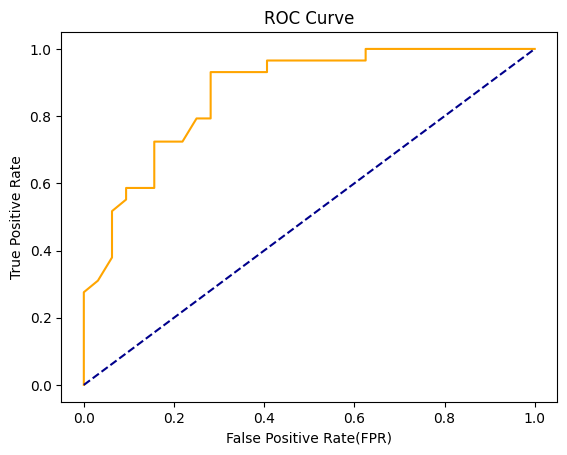

In [14]:
plot_roc_curve(fpr, tpr)

In [15]:
# we can get the AUC score that is area under curve score 
# It ranges from lowest value of 0 to highest of 1

In [16]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, positive_val)

0.8696120689655172

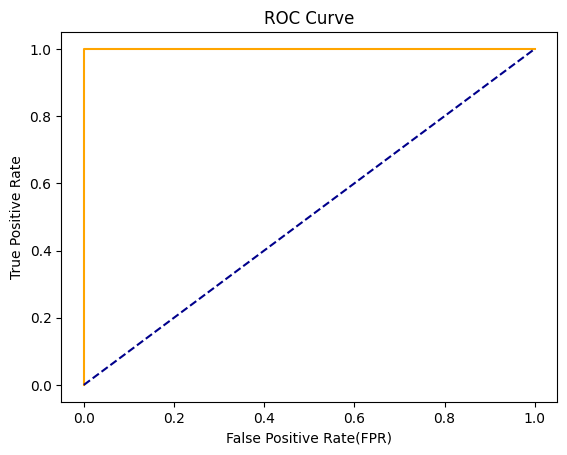

In [17]:
# we can see the parfect model where tp and fp values have curve with area 1

fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [18]:
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

Confusion matrix is used to compare the predicted values of the model with the actual values that are there
1. It can be used for the binary clasication
2. It can also be used for the multiclass classification and hence that will have more number of columns and rows

In [19]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

In [20]:
matrix

array([[23,  9],
       [ 4, 25]], dtype=int64)

1. Here rows have actual values 
2. Columns have predicted values

In [21]:
pd.crosstab(y_test, 
           y_pred,
           rownames=["actual values"], 
           colnames=["predicted values"])

predicted values,0,1
actual values,,
0,23,9
1,4,25


In [22]:
# we can visualize the confusion matrix using  seaborn

<Axes: >

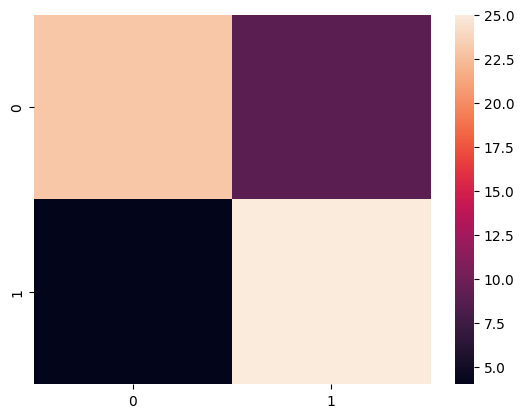

In [23]:
import seaborn as sns

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix)


**Now in the scikitlearn latest version we have got the feature to visualize the matrix**
1. It can be done by using classifier direclty
2. It can also be done by using predicted values

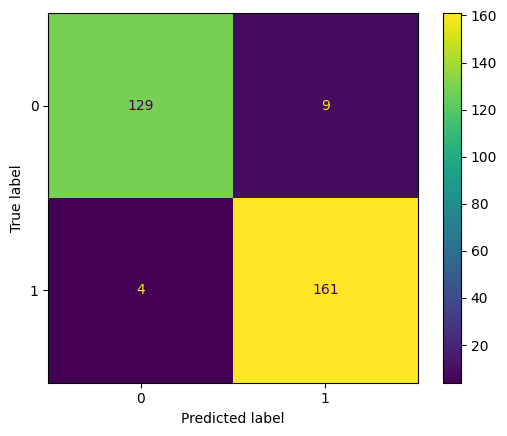

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X, y)
# It uses whole estimator

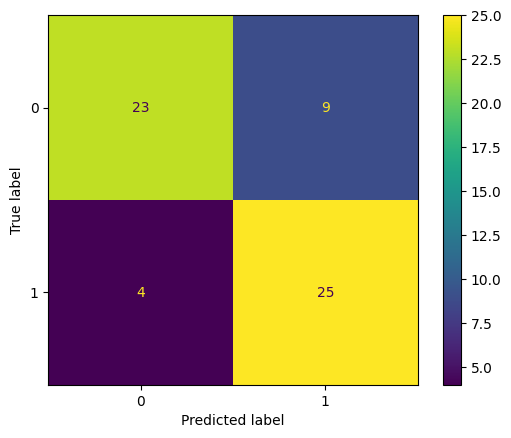

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# It uses the actual test values and also predicted values there

In [26]:
# we can get the full classification report on the different terminologies used in the machine learning

In [28]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

In [29]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



Precision, recall, F1 score, support, accuracy, macro average, and weighted average are commonly used metrics in machine learning to evaluate the performance of classification models.

1. **Precision:**
   - Precision is the ratio of correctly predicted positive observations to the total predicted positives.
   - Formula: Precision = (True Positives) / (True Positives + False Positives)
   - Example: Suppose a model predicts 80 instances as positive, and 70 of them are actually positive. The precision would be 70/80 = 0.875.

2. **Recall:**
   - Recall (Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in the actual class.
   - Formula: Recall = (True Positives) / (True Positives + False Negatives)
   - Example: If there are 100 actual positive instances, and the model correctly identifies 70 of them, the recall would be 70/100 = 0.7.

3. **F1 Score:**
   - F1 Score is the weighted average of precision and recall. It is a balance between precision and recall.
   - Formula: F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
   - Example: If precision is 0.8 and recall is 0.7, the F1 score would be 2 * (0.8 * 0.7) / (0.8 + 0.7) = 0.7619.

4. **Support:**
   - Support is the number of actual occurrences of the class in the specified dataset.
   - Example: If you have 150 instances of class A and 200 instances of class B, the support for class A is 150 and for class B is 200.

5. **Accuracy:**
   - Accuracy is the ratio of correctly predicted observations to the total observations.
   - Formula: Accuracy = (True Positives + True Negatives) / (Total Observations)
   - Example: If a model correctly predicts 900 instances out of 1000, the accuracy would be 900/1000 = 0.9.

6. **Macro Average:**
   - Macro Average calculates the metric independently for each class and then takes the average. It treats all classes equally.
   - Example: If you have precision values of 0.8 for class A and 0.7 for class B, the macro-averaged precision would be (0.8 + 0.7) / 2 = 0.75.

7. **Weighted Average:**
   - Weighted Average calculates the metric for each class and then takes a weighted average based on the number of instances of each class.
   - Example: If you have precision values of 0.8 for class A (with 50 instances) and 0.7 for class B (with 100 instances), the weighted average precision would be (0.8 * 50 + 0.7 * 100) / (50 + 100) = 0.74.

In [30]:
# Above were regression model evaluation matrix

## Regression model evaluation matrix

Sure, let's go over R2 score, Mean Absolute Error (MAE), and Mean Squared Error (MSE) – three common regression metrics.

1. **R2 Score (Coefficient of Determination):**
   - R2 score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.
   - Formula: R2 = 1 - (Sum of Squared Residuals / Total Sum of Squares)
   - Example: If R2 is 0.75, it means that 75% of the variance in the dependent variable can be explained by the independent variables.

2. **Mean Absolute Error (MAE):**
   - MAE measures the average absolute difference between the predicted values and the actual values. It gives equal weight to all errors.
   - Formula: MAE = (1/n) * Σ|predicted - actual|
   - Example: If you have predicted values of [2, 5, 8] and actual values of [1, 4, 7], the MAE would be (|2-1| + |5-4| + |8-7|) / 3 = 1.

3. **Mean Squared Error (MSE):**
   - MSE measures the average squared difference between the predicted values and the actual values. It gives more weight to larger errors.
   - Formula: MSE = (1/n) * Σ(predicted - actual)^2
   - Example: If you have predicted values of [2, 5, 8] and actual values of [1, 4, 7], the MSE would be ((2-1)^2 + (5-4)^2 + (8-7)^2) / 3 = 1.

Let's illustrate these metrics with a simple example:

Suppose you have a regression model that predicts house prices based on features like square footage. You have a dataset with actual house prices and predicted prices:

Actual Prices: [300,000, 400,000, 500,000]
Predicted Prices: [280,000, 380,000, 520,000]

- R2 Score: You calculate the R2 score to see how well the model explains the variance in actual prices.
- MAE: You calculate the mean absolute difference between the actual and predicted prices.
- MSE: You calculate the mean squared difference between the actual and predicted prices.

These metrics help you assess the accuracy and goodness of fit of your regression model.

In [32]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [33]:
import pandas as pd
housing_df = pd.DataFrame(housing_data["data"], 
                         columns=housing_data["feature_names"]
                         )

In [34]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [35]:
housing_df["target"] = housing_data["target"]

In [36]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
X = housing_df.drop('target', axis=1)
y = housing_df.target

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predictions on the test set
y_pred = model.predict(X_test)

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


R2 Score: 0.8079406250909046
Mean Absolute Error (MAE): 0.33119574990310097
Mean Squared Error (MSE): 0.2596121528694577
